# HR Analytics
### Business Understanding
- Our end-users would like to know **why** employees leave.
- They'd like to know the factors that might contribute employees' leaving.
- They hope that they might be able to predict which employee would leave so they can implement a possible solution.

### Analytic Approach
- We'll investigate why employees leave by looking at various attributes of employees.
- Then we'll build a prediction model to predict employees who may leave.
- We'll conduct this analysis on the dataset given.



#### Install and import packages

In [57]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/a4/6469cbec8e5ac5fe26c5ccbdcccbbf6a6c0aab7968fcdeac617c8704dc51/scipy-1.6.0-cp37-cp37m-macosx_10_9_x86_64.whl
You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Get data and check data quality

In [7]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.info()  # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [38]:
display('Number types', df.describe(include='number').T)
display('Object (string) types ', df.describe(include='object').T )

'Number types'

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


'Object (string) types '

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


#### Cross tables of percentage of employees who leave based on attributes of object data type

In [76]:
number_columns = df.select_dtypes('number').columns.drop('left')
object_columns = df.select_dtypes('object').columns

'sales'

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
1,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


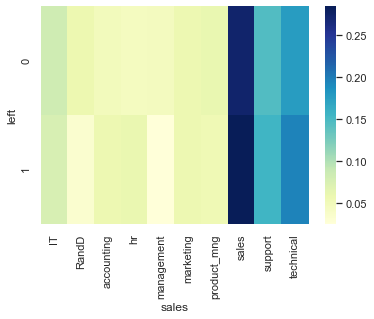

'salary'

salary,high,low,medium
left,,,
0,0.101068,0.450123,0.448810
1,0.022963,0.608233,0.368804


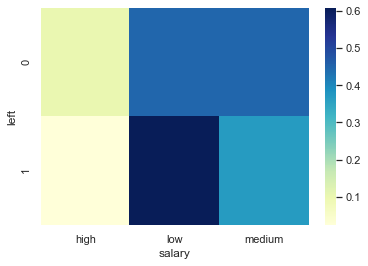

In [150]:
target = df['left']
# cols = df.drop(columns=['left']).columns

for col in object_columns:
    cross_tab = pd.crosstab(target, df[col]).apply(lambda r: r/r.sum(), axis=1)
    display(col, cross_tab)
    sns.heatmap(cross_tab, cmap="YlGnBu")
    plt.show()

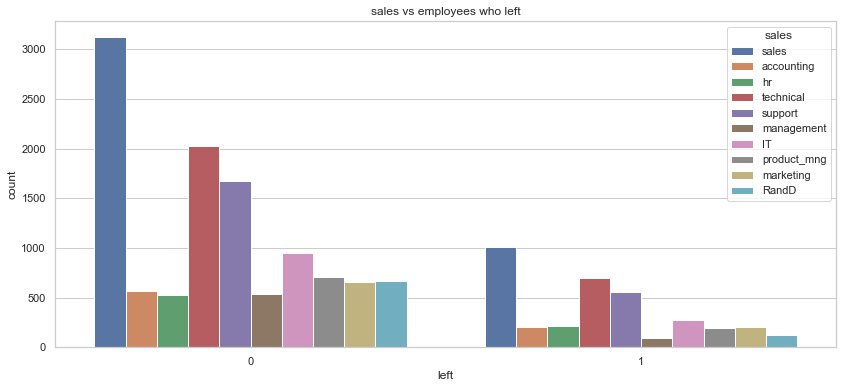

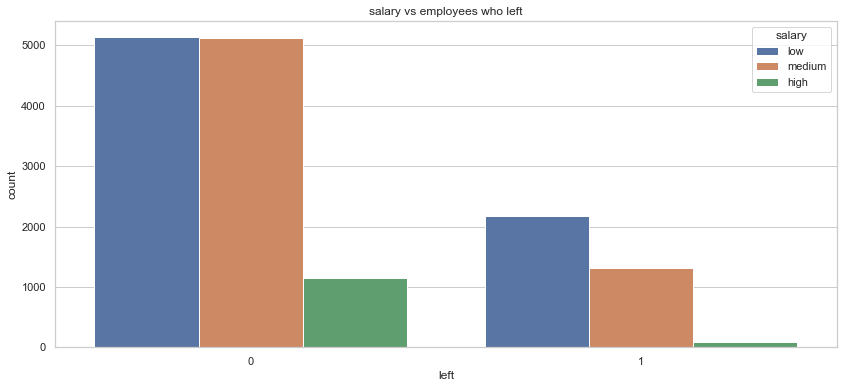

In [151]:
# count plot by sales and salary
plt.figure(figsize=(14,6))
sns.countplot(x='left', hue='sales', data=df)
plt.title('sales vs employees who left')
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(x='left', hue='salary', data=df)
plt.title('salary vs employees who left')
plt.show()

- Those who work in Sales, Support and Technical would likely to leave compared to others.
- Higher paying employees are more likely to stay, but those with low salary are leaving than staying.

#### Visualize data

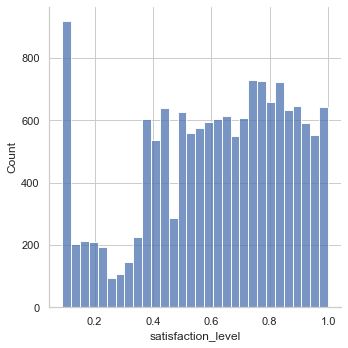

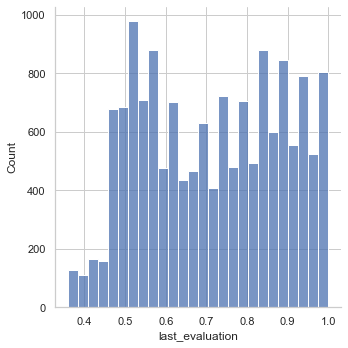

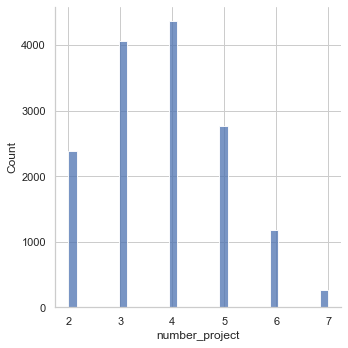

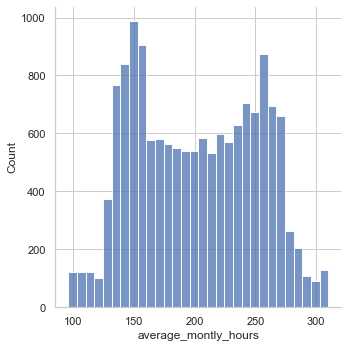

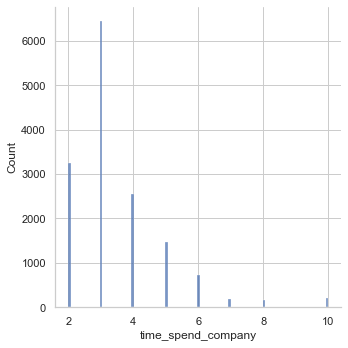

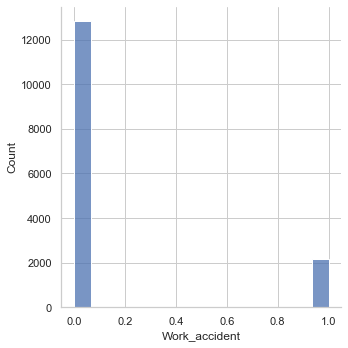

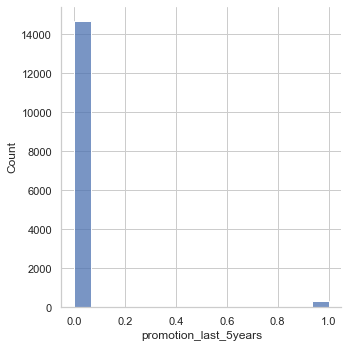

In [138]:
for col in number_columns:
    ax = sns.displot(df[col])
    plt.show()

'Correlation between all number type variables'

<AxesSubplot:>

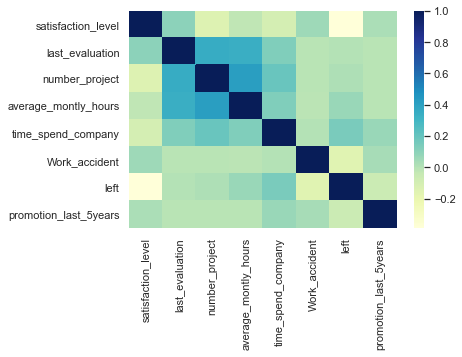

In [86]:
display('Correlation between all number type variables', sns.heatmap(df.corr(), cmap="YlGnBu"))

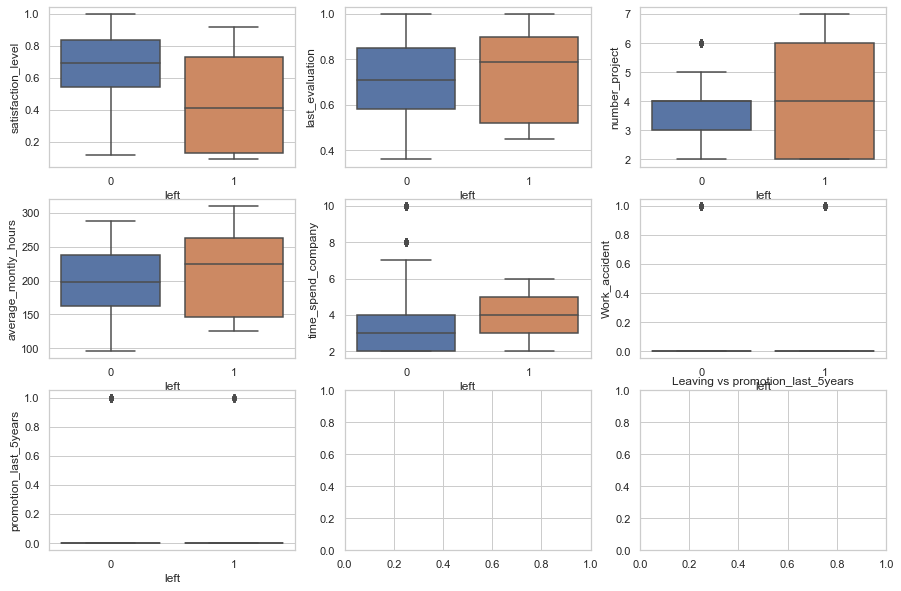

In [134]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(df[number_columns], ax.flatten()):
    sns.boxplot(x='left', y=var, data=df, ax=subplot)

### Conclusion

- Eash independent variable seem to have some relations to the dependent variable, but monthly_hours and time_spent_company are most correlated as single variables.
- If you work in tech, support, or sale, then you'd likely leave than other positions.
- High salaried employees stay, low salaried leave. Work hours don't have impact on salary.
- Avg satisfaction level of those who left are 30% lower than those who stayed.
- Those who left worked avg of 25hrs/month than those who stayed.

### Next Steps
- We'll conduct feature engineering to extract meaningful attributes that are better than existing ones.
- We'll define "success" by gathering the metrics that our prediction model will need to meet (ex. accruacy >= 80%).
- We'll select models to identify the best performant model.
